In [2]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl

In [3]:
plt.rc ('font', size = 10) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 10) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 10) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 10) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 10) #Schriftgröße der Legende

In [4]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

FitFunktionen

In [5]:
def gaus1fit(von,bis,path,m=1,mmin=0,mmax=2,s=0.2,smax=1000,scale=1e-9,override=False): 
    vonarr = pos(von)
    bisarr = pos(bis)

    model_gaus = lmfit.models.GaussianModel()  
    pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])
    if override:
        #pars_gaus = model_gaus.make_params()
        pars_gaus["center"].set(value=m,min=mmin,max=mmax)
        pars_gaus["sigma"].set(value=1,min=0)
        pars_gaus["amplitude"].set(value=1,min=0)


    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())


    return np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])




def gaus2fit(von,bis,path,override=False,m1=1,s1=1,scale1=1,m2=1,s2=1,scale2=1,m1min=1,m1max=1,m2min=1,m2max=1): 
    vonarr = pos(von)
    bisarr = pos(bis)

    model_gaus=lmfit.models.GaussianModel(prefix="g1_")+lmfit.models.GaussianModel(prefix="g2_")

    def guess(data,x):
        params_g1=lmfit.models.GaussianModel(prefix="g1_").guess(data,x)
        params=model_gaus.make_params()
        for i in params_g1:
            params[i]=params_g1[i]
                    
        params["g2_center"].value=params.get("g1_center").value-1
        params["g2_sigma"].value=params.get("g1_sigma").value*0.5
        params["g2_amplitude"].value=params.get("g1_amplitude").value*0.3
        return params

    model_gaus.guess=guess
    pars_gaus = model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])
    if override:
        #pars_gaus = model_gaus.make_params()
        pars_gaus["g1_center"].set(value=m1,min=m1min,max=m1max)
        pars_gaus["g1_sigma"].set(value=s1)
        pars_gaus["g1_amplitude"].set(value=scale1,min=0)
        pars_gaus["g2_center"].set(value=m2,min=m2min,max=m2max)
        pars_gaus["g2_sigma"].set(value=s2)
        pars_gaus["g2_amplitude"].set(value=scale2,min=0)


    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())

    return np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])

Daten einlesen und Standartfehler as Fehler der Counts festlegen

<ErrorbarContainer object of 3 artists>

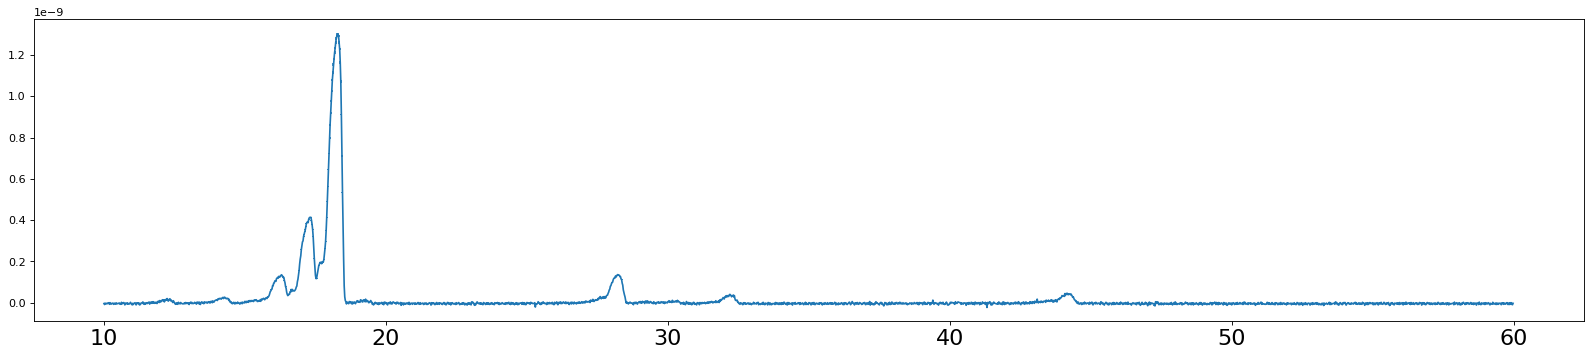

In [6]:

with open('Data/Restgas_3.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.005
data = np.vstack([data,err])

v = pos(10)
b = pos(60)

data[1],data[2] = data[1]/28,data[2]/28
fig = plt.figure(figsize=(25,5),dpi=80,linewidth=50)
plt.errorbar(data[0,v:b],data[1,v:b],yerr=data[2,v:b],label = 'Data')
#plt.vlines(18.6,0,10e-9)


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 30
    # variables        = 3
    chi-square         = 450472.030
    reduced chi-square = 16684.1493
    Akaike info crit   = 294.505617
    Bayesian info crit = 298.709209
[[Variables]]
    amplitude:  3.1352e-12 +/- 5.0005e-13 (15.95%) (init = 9.21427e-12)
    center:     12.2048535 +/- 0.01513422 (0.12%) (init = 12.22333)
    sigma:      0.12520718 +/- 0.01187989 (9.49%) (init = 0.16)
    fwhm:       0.29484038 +/- 0.02797500 (9.49%) == '2.3548200*sigma'
    height:     9.9896e-12 +/- 2.1097e-12 (21.12%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = -0.336
    C(amplitude, center) = 0.133


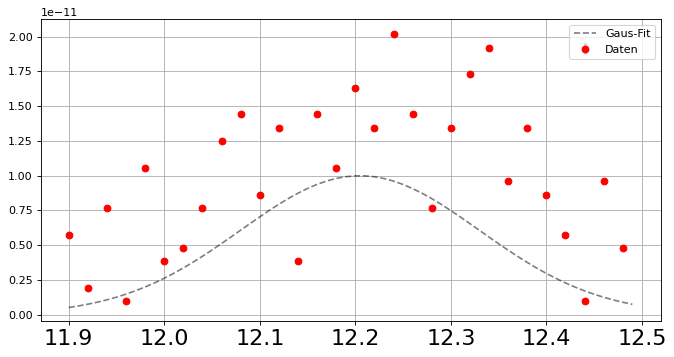

In [17]:
p12 = gaus1fit(11.9,12.5,'Restgas_3_12.2')



[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 32
    # variables        = 3
    chi-square         = 100251.413
    reduced chi-square = 3456.94527
    Akaike info crit   = 263.590417
    Bayesian info crit = 267.987625
[[Variables]]
    amplitude:  1.0174e-11 +/- 5.6250e-13 (5.53%) (init = 1.43973e-11)
    center:     14.2055072 +/- 0.00879863 (0.06%) (init = 14.231)
    sigma:      0.16720765 +/- 0.00801929 (4.80%) (init = 0.2)
    fwhm:       0.39374392 +/- 0.01888398 (4.80%) == '2.3548200*sigma'
    height:     2.4274e-11 +/- 1.8632e-12 (7.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = 0.258
    C(amplitude, center) = 0.145
    C(amplitude, sigma)  = -0.101


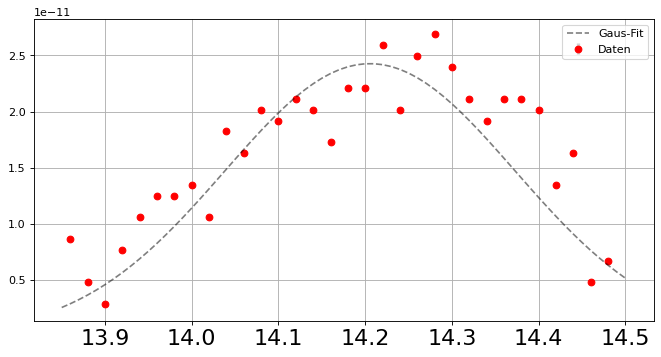

In [8]:
p14 = gaus1fit(13.85,14.5,'Restgas_3_14.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 37
    # variables        = 3
    chi-square         = 14458.7573
    reduced chi-square = 425.257567
    Akaike info crit   = 226.821093
    Bayesian info crit = 231.653846
[[Variables]]
    amplitude:  7.4510e-11 +/- 1.4522e-12 (1.95%) (init = 7.947287e-11)
    center:     16.2139039 +/- 0.00551984 (0.03%) (init = 16.21)
    sigma:      0.22745884 +/- 0.00478732 (2.10%) (init = 0.23)
    fwhm:       0.53562463 +/- 0.01127328 (2.10%) == '2.3548200*sigma'
    height:     1.3068e-10 +/- 3.1568e-12 (2.42%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = 0.660
    C(amplitude, center) = 0.485
    C(amplitude, sigma)  = 0.292


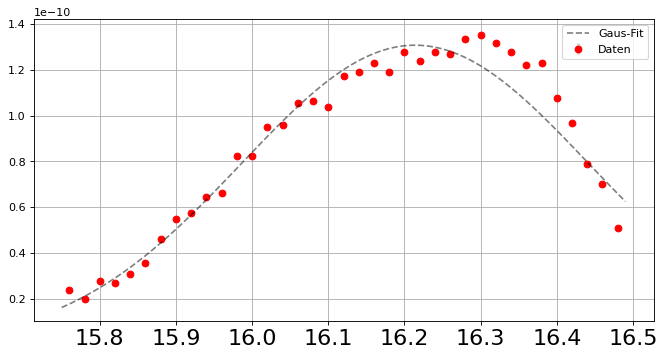

In [9]:
p16 = gaus1fit(15.75,16.5,'Restgas_3_16.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 35
    # variables        = 3
    chi-square         = 8668.91304
    reduced chi-square = 270.903533
    Akaike info crit   = 198.925272
    Bayesian info crit = 203.591316
[[Variables]]
    amplitude:  2.2791e-10 +/- 3.6961e-12 (1.62%) (init = 2.293201e-10)
    center:     17.2281881 +/- 0.00450977 (0.03%) (init = 17.22)
    sigma:      0.22012734 +/- 0.00391502 (1.78%) (init = 0.22)
    fwhm:       0.51836026 +/- 0.00921917 (1.78%) == '2.3548200*sigma'
    height:     4.1304e-10 +/- 8.0934e-12 (1.96%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = 0.669
    C(amplitude, center) = 0.510
    C(amplitude, sigma)  = 0.339


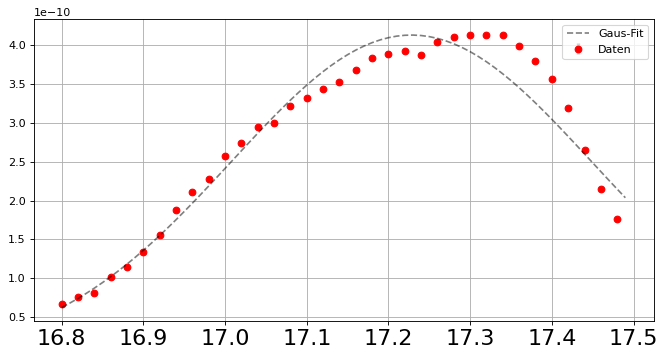

In [10]:
p17 = gaus1fit(16.8,17.5,'Restgas_3_17.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 38
    # variables        = 3
    chi-square         = 218072.066
    reduced chi-square = 6230.63045
    Akaike info crit   = 334.889799
    Bayesian info crit = 339.802557
[[Variables]]
    amplitude:  5.3333e-10 +/- 4.0132e-11 (7.52%) (init = 8.775137e-10)
    center:     18.1430501 +/- 0.00935066 (0.05%) (init = 18.21)
    sigma:      0.15618700 +/- 0.00579111 (3.71%) (init = 0.23)
    fwhm:       0.36779228 +/- 0.01363703 (3.71%) == '2.3548200*sigma'
    height:     1.3623e-09 +/- 1.3085e-10 (9.61%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.492
    C(amplitude, sigma)  = -0.392
    C(amplitude, center) = 0.218


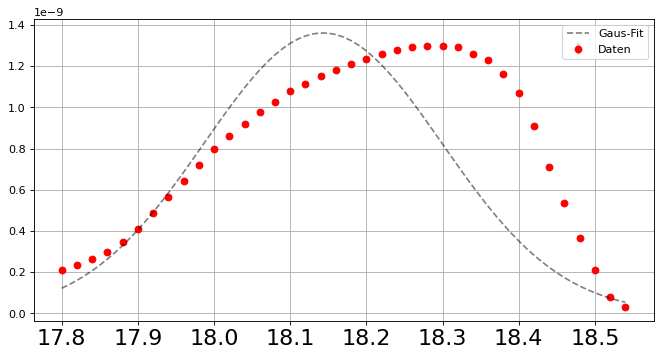

In [11]:
p18 = gaus1fit(17.8,18.55,'Restgas_3_18.2')#,override=True,m1=18.21,m1min=18.15,m1max=18.5,s1=0.23,scale1=8.940706e-10,m2=17.61,m2min=17.6,m2max=17.8,s2=0.5,scale2=2.682212e-10)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 40
    # variables        = 3
    chi-square         = 58614.0373
    reduced chi-square = 1584.16317
    Akaike info crit   = 297.594002
    Bayesian info crit = 302.660640
[[Variables]]
    amplitude:  6.7091e-11 +/- 2.2673e-12 (3.38%) (init = 7.601764e-11)
    center:     28.1624148 +/- 0.00679979 (0.02%) (init = 28.18)
    sigma:      0.21052507 +/- 0.00652143 (3.10%) (init = 0.22)
    fwhm:       0.49574865 +/- 0.01535680 (3.10%) == '2.3548200*sigma'
    height:     1.2714e-10 +/- 6.1703e-12 (4.85%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = 0.383
    C(amplitude, center) = 0.223
    C(amplitude, sigma)  = -0.121


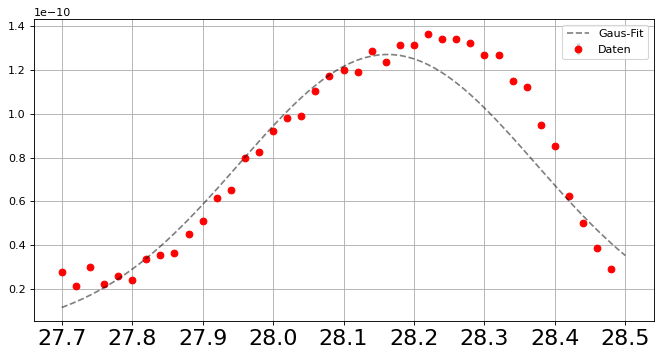

In [12]:
p28 = gaus1fit(27.7,28.5,'Restgas_3_28.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 35
    # variables        = 3
    chi-square         = 241105.281
    reduced chi-square = 7534.54005
    Akaike info crit   = 315.317432
    Bayesian info crit = 319.983476
[[Variables]]
    amplitude:  1.4272e-11 +/- 1.2266e-12 (8.59%) (init = 2.361139e-11)
    center:     32.1689068 +/- 0.00824143 (0.03%) (init = 32.168)
    sigma:      0.13632972 +/- 0.00500851 (3.67%) (init = 0.2)
    fwhm:       0.32103195 +/- 0.01179414 (3.67%) == '2.3548200*sigma'
    height:     4.1765e-11 +/- 4.3591e-12 (10.44%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = -0.342
    C(center, sigma)    = 0.131


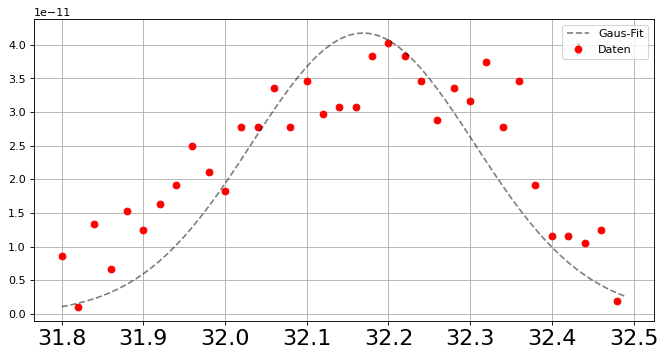

In [13]:
p32 = gaus1fit(31.8,32.5,'Restgas_3_32.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 45
    # variables        = 3
    chi-square         = 261618.065
    reduced chi-square = 6229.00154
    Akaike info crit   = 396.059031
    Bayesian info crit = 401.479018
[[Variables]]
    amplitude:  2.0377e-11 +/- 1.3969e-12 (6.86%) (init = 2.721074e-11)
    center:     44.1508778 +/- 0.01188613 (0.03%) (init = 44.17)
    sigma:      0.20104888 +/- 0.01037341 (5.16%) (init = 0.21)
    fwhm:       0.47343393 +/- 0.02442751 (5.16%) == '2.3548200*sigma'
    height:     4.0434e-11 +/- 3.8958e-12 (9.64%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = 0.425
    C(amplitude, sigma)  = -0.272
    C(amplitude, center) = 0.115


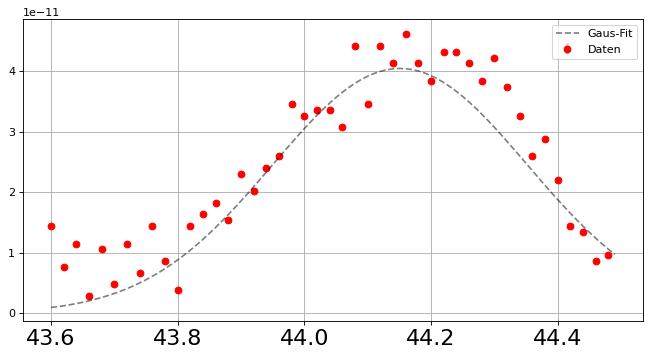

In [14]:
p44 = gaus1fit(43.6,44.5,'Restgas_3_44.2')

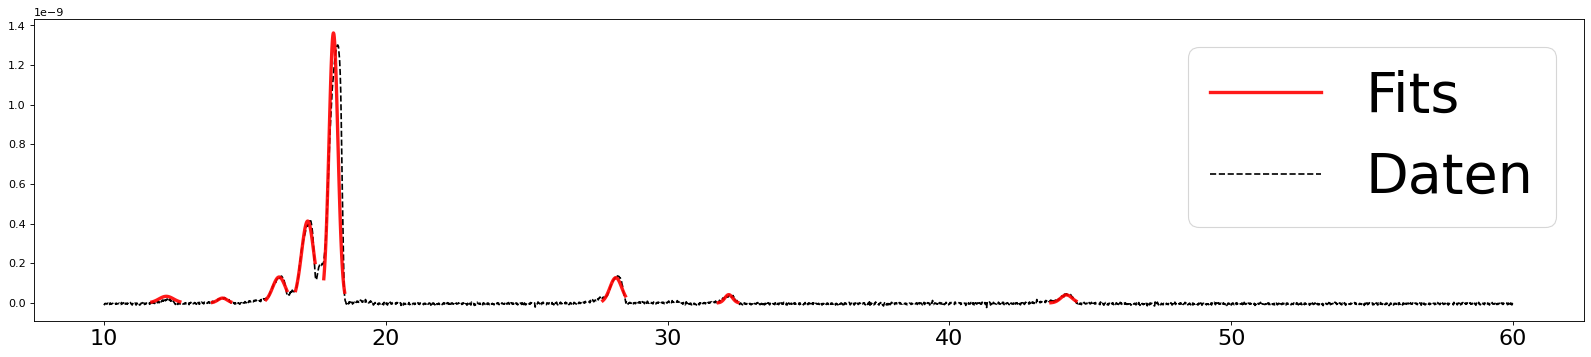

In [15]:
fig = plt.figure(figsize=(25,5),dpi=80,linewidth=50)
plt.errorbar(data[0],data[1],zorder=5,mfc='black',color='k',linestyle='--',label='Daten')
plt.plot(p12[0],p12[1],zorder=10,label='Fits',color='r',alpha=0.9,linewidth=3)
plt.plot(p14[0],p14[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p16[0],p16[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p17[0],p17[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p18[0],p18[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p28[0],p28[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p32[0],p32[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p44[0],p44[1],zorder=10,color='r',alpha=0.9,linewidth=3)


plt.legend(fontsize=50)